In [70]:
import re
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("clean_tweets.csv")

In [5]:
df.columns

Index(['tweet_id', 'username', 'party', 'tweet', 'clean_text',
       'favorite_count', 'retweet_count', 'created_at', 'source',
       'social_policy', 'geopolitical_policy', 'policies',
       'positive_sentiment', 'neutral_sentiment', 'negative_sentiment',
       'compound_sentiment', 'sentiment_text'],
      dtype='object')

### Boxplots, Violin, and Swarmplots

In [ ]:
plt.figure(1, figsize=(6, 4))

sns.violinplot(x="party", y="compound_sentiment", data=df)
sns.swarmplot(x="party", y="compound_sentiment", data=df, palette="Paired")
plt.ylabel("Sentiment")
plt.title("Violinplots & Swarmplots")
plt.show()

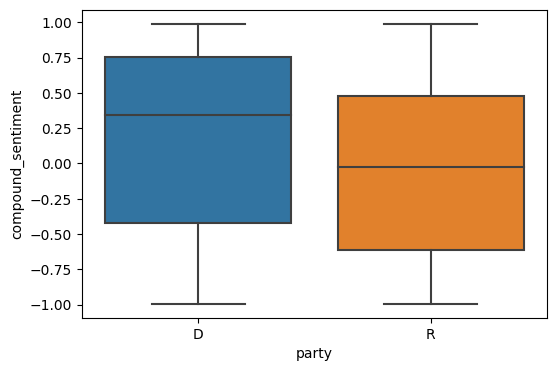

In [6]:
plt.figure(1, figsize=(6, 4))

sns.boxplot(data=df, x="party", y="compound_sentiment")

plt.show()

### Distribution plot

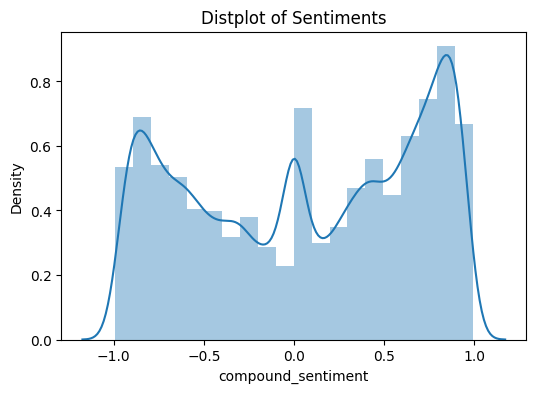

In [7]:
plt.figure(1, figsize=(6, 4))

sns.distplot(df["compound_sentiment"], bins=20)
plt.title("Distplot of Sentiments")

plt.show()

## Clustering with KMeans

In [8]:
from sklearn.cluster import KMeans

In [10]:
X1 = df[["compound_sentiment"]].iloc[:, :].values
inertia = []
for n in range(1, 11):
    algorithm = KMeans(
        n_clusters=n,
        tol=0.0001,
        random_state=111,
        algorithm="lloyd",
    )
    try:
        algorithm.fit(X1)
    except:
        pass
    inertia.append(algorithm.inertia_)

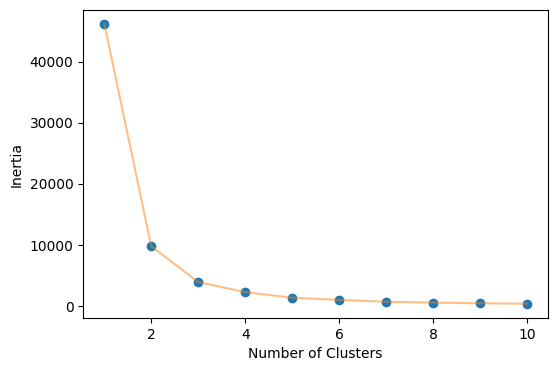

In [11]:
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, 11), inertia, "o")
plt.plot(np.arange(1, 11), inertia, "-", alpha=0.5)
plt.xlabel("Number of Clusters"), plt.ylabel("Inertia")
plt.show()

**Ploting inertia vs number of clusters elbows at 3. Approx 3 cluster groups exists within the dataset**

In [12]:
# initialize with 4 clusters

algorithm = KMeans(
    n_clusters=4,
    tol=0.0001,
    random_state=111,
    algorithm="lloyd",
)

algorithm.fit(X1)

KMeans(n_clusters=4, random_state=111)

In [35]:
# cluster labels

labels = np.unique(algorithm.labels_)
label_names = ["Grp1", "Grp2", "Grp3", "Grp4"]

In [15]:
# centroids of the clusters

centroids = algorithm.cluster_centers_
centroids

array([[-0.74042249],
       [ 0.35247398],
       [ 0.78434079],
       [-0.1564395 ]])

In [17]:
# predict the category of the sentiment values in the dataframe

preds = algorithm.predict(X1)

In [19]:
df["cluster"] = preds

In [22]:
# name cluster values


def rename_cluster_values(value):
    if value == 0:
        name = "Grp1"
    elif value == 1:
        name = "Grp2"
    elif value == 2:
        name = "Grp3"
    elif value == 3:
        name = "Grp4"
    elif value == 4:
        name = "Grp5"
    elif value == 5:
        name = "Grp6"
    elif value == 6:
        name = "Grp7"
    elif value == 7:
        name = "Grp8"

    return name

In [23]:
df["cluster_name"] = df.cluster.apply(rename_cluster_values)

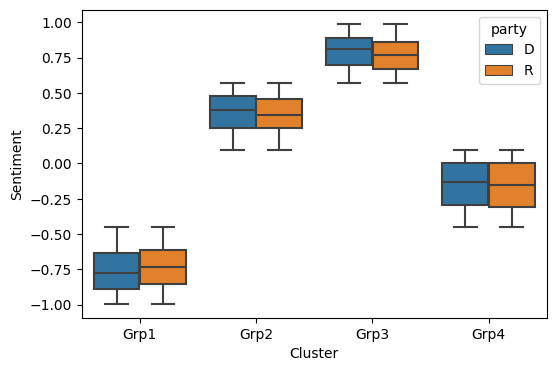

In [40]:
# plot boxplot of the clusters

fig = plt.figure(1, figsize=(6, 4))
ax = fig.add_subplot(1, 1, 1)

sns.boxplot(data=df, x="cluster", y="compound_sentiment", hue="party")
plt.xticks(ticks=labels, rotation=0, labels=label_names, fontsize=10)
plt.ylabel("Sentiment")
plt.xlabel("Cluster")
plt.show()

In [45]:
# plot per policy
import json

# open json file consisting of policies and its sub-groups
with open("data.json") as json_file:
    categories = json.load(json_file)

In [68]:
# extract policies of interest

options = {**categories["Social Policies"], **categories["Geo Political Policies"]}
options = list(options.keys())
options.remove("All")

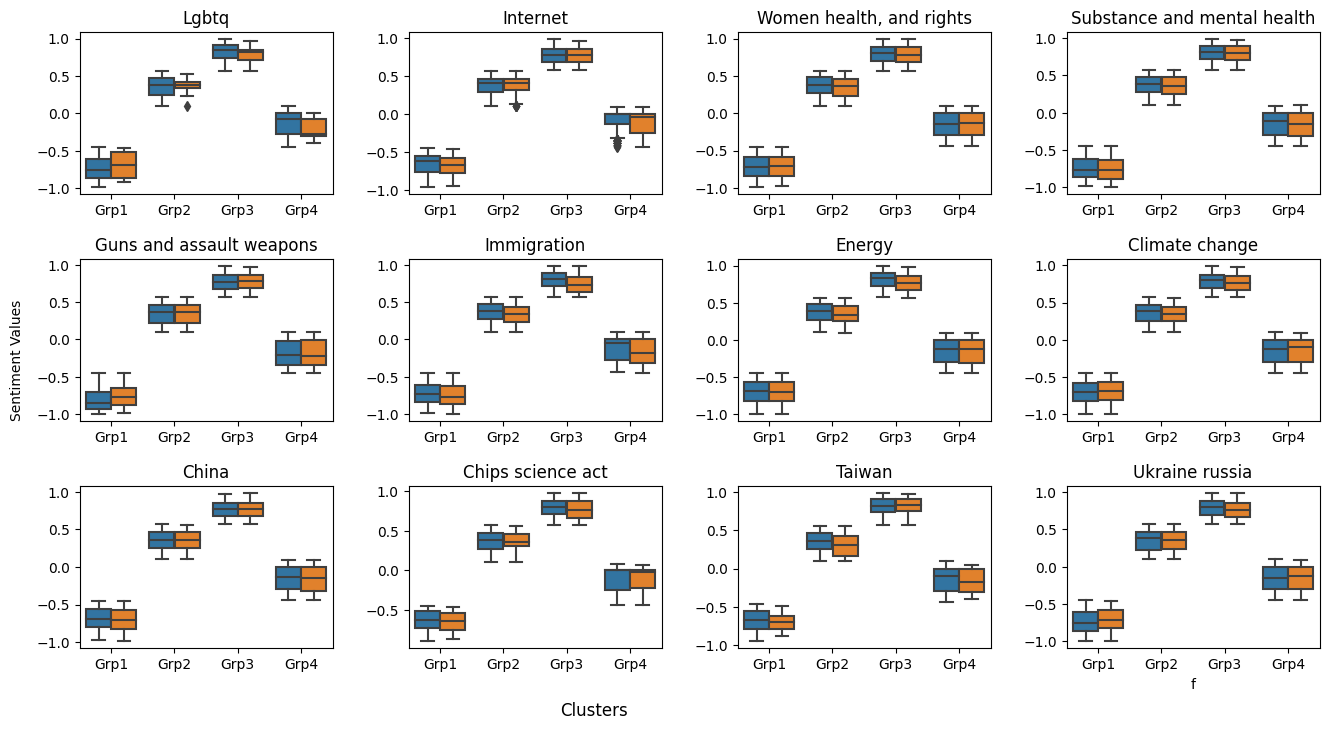

In [115]:
fig = plt.figure(1, figsize=(16, 8))
n = 0

for option in options:
    n += 1

    # category df
    cat_df = df[df.policies.str.contains(r"%s" % option, re.I, regex=True)]

    ax = fig.add_subplot(3, 4, n)
    plt.subplots_adjust(hspace=0.4, wspace=0.3)
    sns.boxplot(data=cat_df, x="cluster", y="compound_sentiment", hue="party")
    plt.xticks(ticks=labels, rotation=0, labels=label_names, fontsize=10)
    plt.ylabel("")
    plt.xlabel("")
    plt.legend(loc="best", fontsize=8)
    plt.title("{}".format(option.capitalize()))
    ax.get_legend().remove()

ax.text(-17.2, 2, "Sentiment Values", rotation=90)  # y labels
ax.text(-8.5, -2, "Clusters", fontsize=12)  # x label
plt.xlabel("f")
plt.show()

### Grouped Barchart

<Figure size 600x400 with 0 Axes>

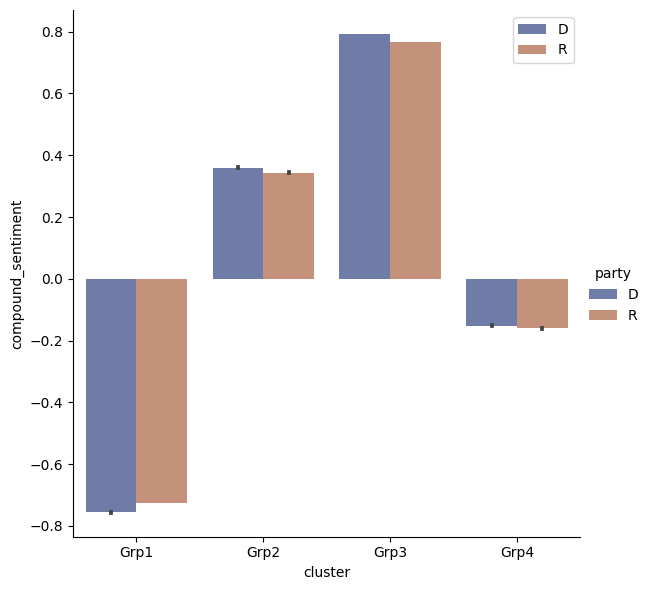

In [125]:
plt.figure(1, figsize=(6, 4))
sns.catplot(
    data=df, kind="bar",
    x="cluster", y="compound_sentiment", hue="party",
    errorbar="se", palette="dark", alpha=.6, height=6
)
plt.xticks(ticks=labels, rotation=0, labels=label_names, fontsize=10)
plt.legend(loc="best")
plt.show()